In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns

In [2]:
df = pd.read_csv('concrete_data.csv')

In [3]:
#checking for missing values

df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'blast_furnace_slag'}>,
        <AxesSubplot:title={'center':'fly_ash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplasticizer'}>,
        <AxesSubplot:title={'center':'coarse_aggregate'}>],
       [<AxesSubplot:title={'center':'fine_aggregate '}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'concrete_compressive_strength'}>]],
      dtype=object)

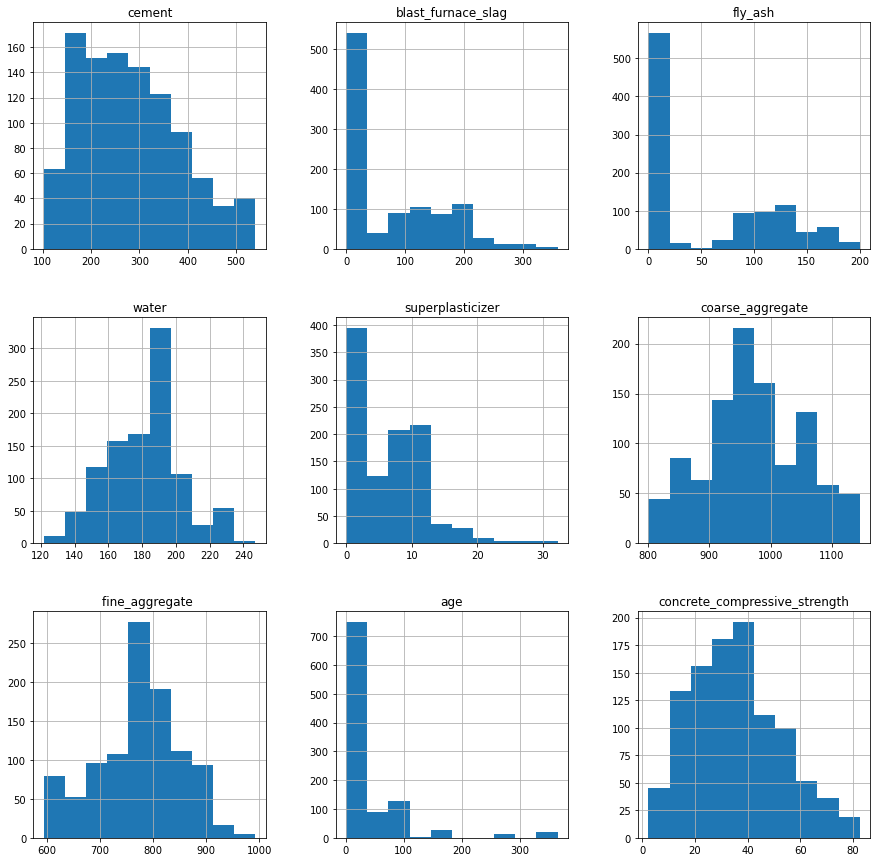

In [6]:
# checking for histogram 
df.hist(figsize=(15, 15))

<AxesSubplot:title={'center':'Spearman rank Correlation Matrix'}>

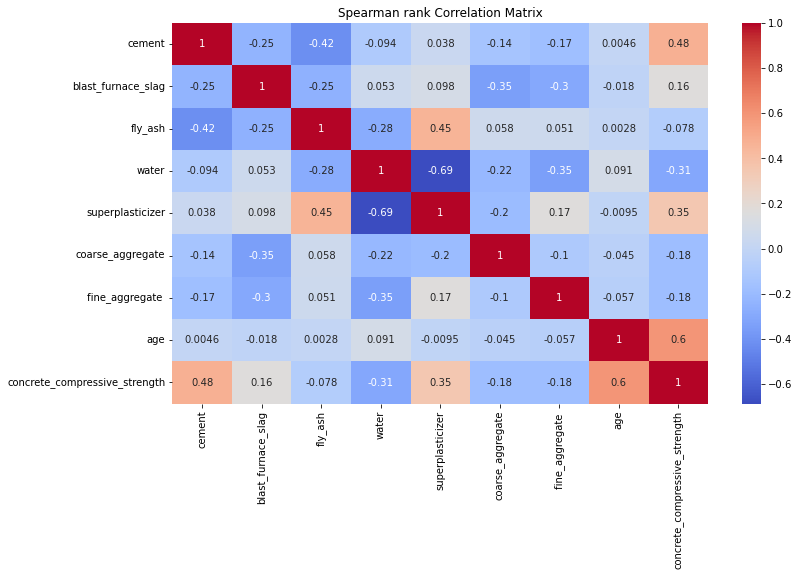

In [7]:
#Spearman rank correlation matrix to capture non linear relationships as well
plt.figure(figsize=(12,7))
plt.title('Spearman rank Correlation Matrix')
sns.heatmap(df.corr(method = 'spearman'),annot=True, cmap = 'coolwarm')

## Inference

- Age, Cement, super plasticizer and Blast furnace slag are in positive correlation to the Concrete compressive strength.
- While water, coarse aggregae and fine aggregate are in negative correlation to the Concrete compressive strength.
- Fly ash is having nearly 0 correlation with the target variable.
- Super plasticizer is having negative correlation to the water.

In [8]:
#outliers check
def outl(x):
    plt.figure(figsize=(12,7))
    plt.subplot(121)
    plt.boxplot(df[x])
    plt.subplot(122)
    sns.distplot(df[x])
    plt.tight_layout()
    plt.show()

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


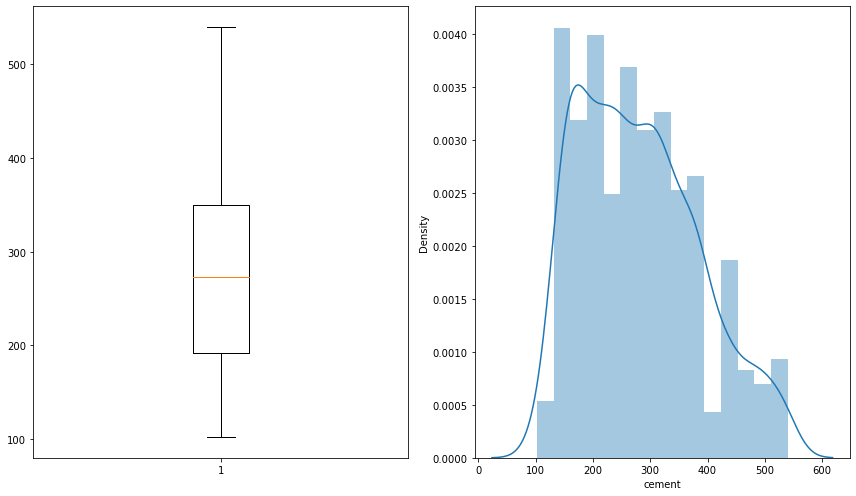

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


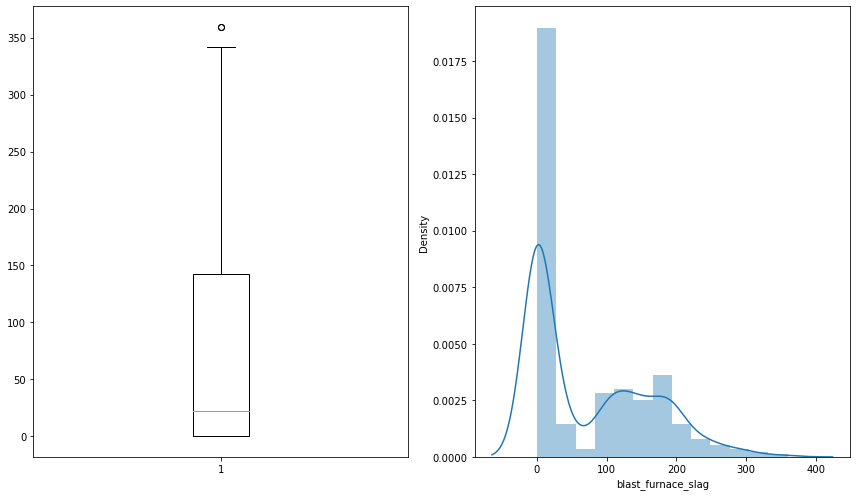

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


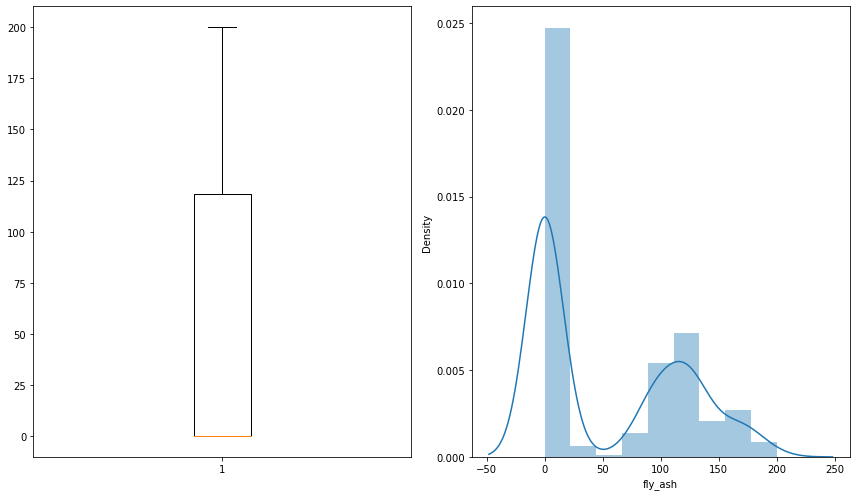

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


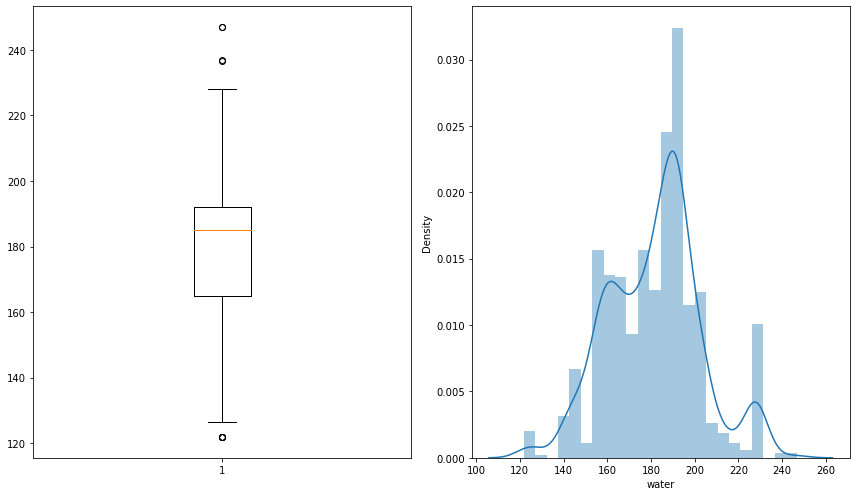

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


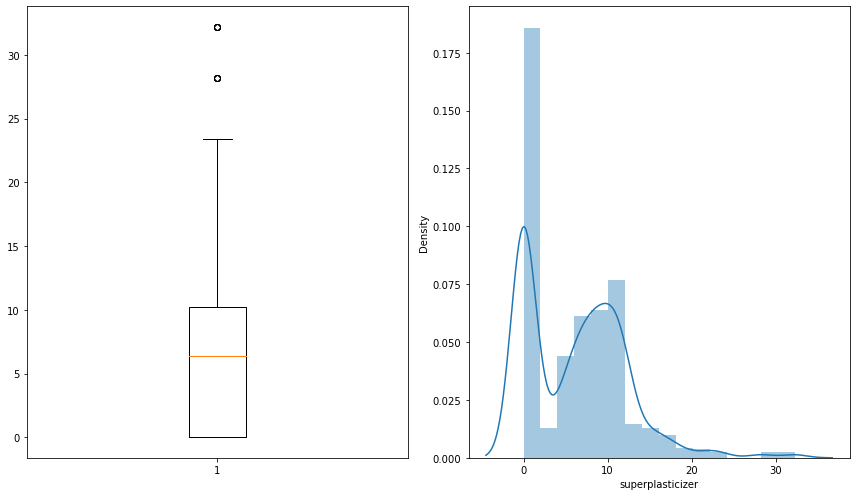

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


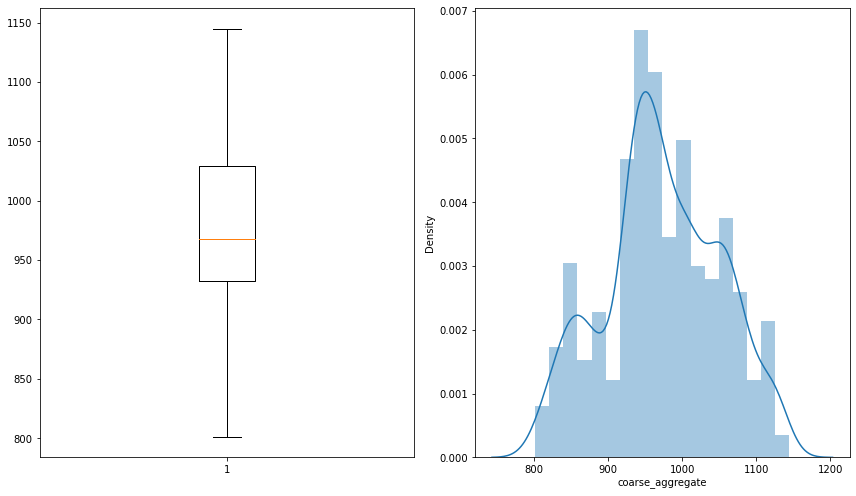

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


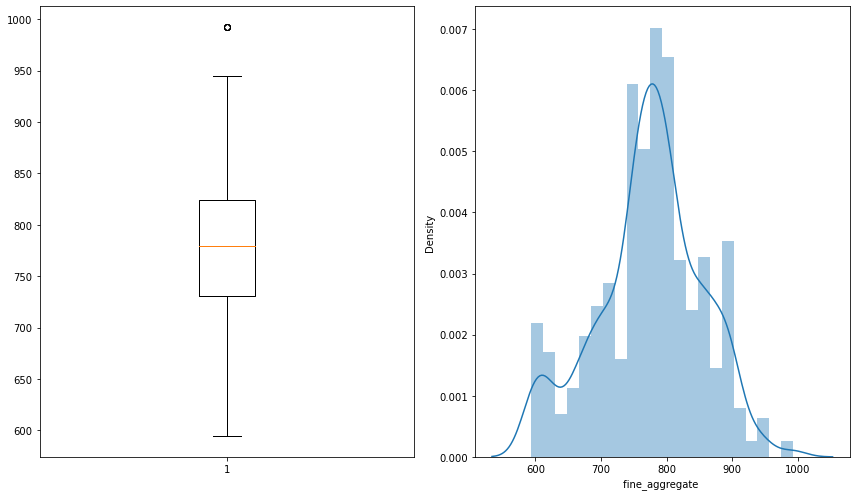

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


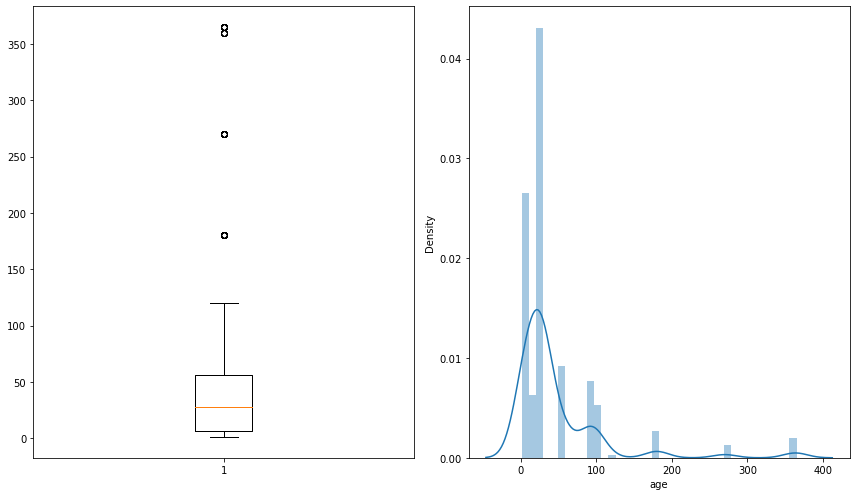

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


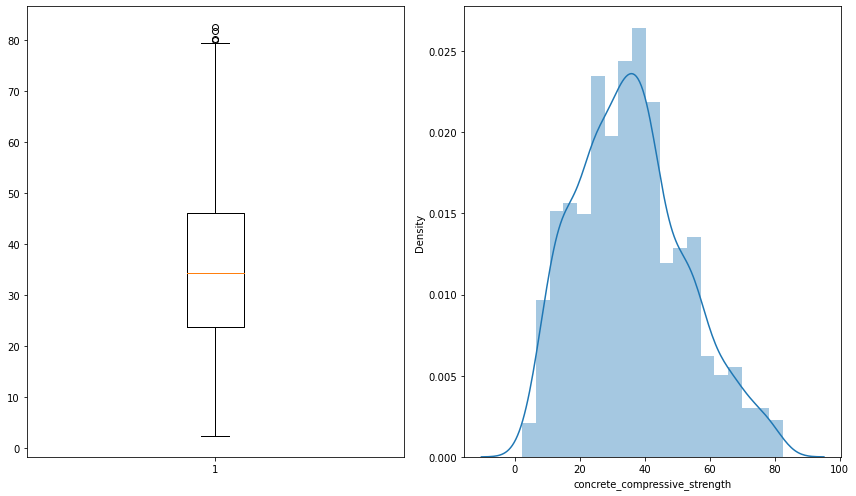

In [9]:
for col in df.columns:
    outl(col)

In [10]:
# checking age column
df['age'].describe()

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

In [11]:
#remove in age outlier 

#using iqr method, considering both including and excluding the lower and upper limits into two separate dataframes, 
# then merging both the dataframes into one.
# This increases the data size so that a Machine learning model can be trained efficiently.
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.50)
q3 = df['age'].quantile(0.75)
IQR = q3-q1

lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR

data_inc = df.loc[(df['age']>=lower_limit) & (df['age']<=upper_limit)]
data_esc = df.loc[(df['age']>lower_limit) & (df['age']<upper_limit)]
df = pd.concat([data_inc,data_esc])

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


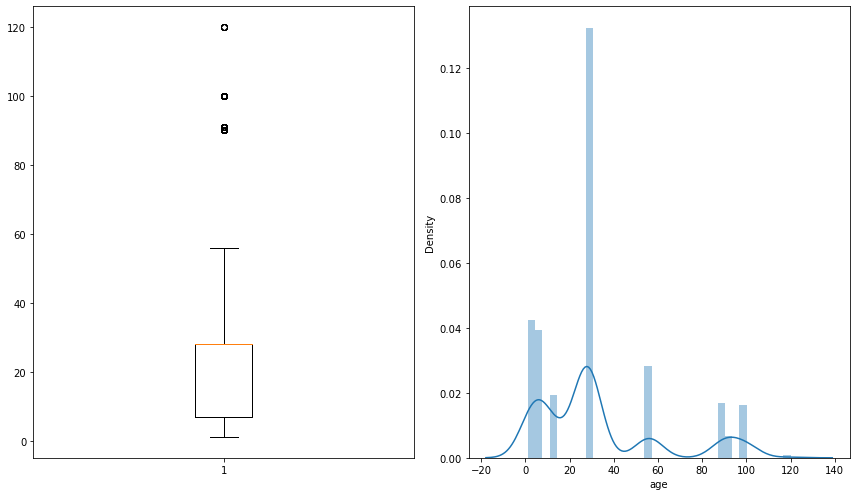

In [12]:
#Check
outl('age')

# Linear regression

In [13]:
#import sklearn and statsmodels
import sklearn
import statsmodels.api as sm

In [14]:
#train test split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.30, shuffle=True, random_state=42)
print('df_train shape is {0}, df_test is {1}'.format(df_train.shape,df_test.shape))

df_train shape is (1359, 9), df_test is (583, 9)


In [15]:
#Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler

def fscale(train,test):
    scaler = StandardScaler()
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    
    return train, test

In [16]:
#calling the above function
df_train_sc,df_test_sc = fscale(df_train,df_test)

In [17]:
#Check
df_train_sc = pd.DataFrame(df_train_sc,columns=df.columns)

df_test_sc = pd.DataFrame(df_test_sc,columns=df.columns)

In [18]:
y_train_sc = df_train_sc['concrete_compressive_strength']
X_train_sc = df_train_sc.drop('concrete_compressive_strength',axis=1)
y_test_sc = df_test_sc['concrete_compressive_strength']
X_test_sc = df_test_sc.drop('concrete_compressive_strength',axis=1)

 # Feature selection using Backward Elimination
 The performance metric used here to evaluate feature performance is p-value. If the p-value is above 0.05 then we remove the feature, else we keep it.

In [19]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#Function for model building and fitting
def lr_sm(X_train,y_train):
    X_train_const = sm.add_constant(X_train)
    lr = sm.OLS(y_train,X_train_const).fit()
    return lr

In [20]:
#calling function
lr_sm = lr_sm(X_train_sc,y_train_sc)

lr_sm.pvalues

const                  1.000000e+00
cement                 2.972168e-67
blast_furnace_slag     1.852821e-31
fly_ash                1.692251e-12
water                  5.161767e-12
superplasticizer       3.187916e-02
coarse_aggregate       9.600872e-01
fine_aggregate         8.002238e-01
age                   9.517233e-217
dtype: float64

In [21]:
#Backward Elimination 
cols = list(X_train_sc.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train_sc[cols]
    X_1 = sm.add_constant(X_1)
    lr = sm.OLS(y_train_sc,X_1).fit()
    p = pd.Series(lr.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'age']


In [22]:
X_train_be = X_train_sc[selected_features_BE]
X_test_be = X_test_sc[selected_features_BE]

#building a linear regression model
lr = LinearRegression()

#fitting
lr.fit(X_train_be,y_train_sc)

#predictions
y_pred_train_be = lr.predict(X_train_be)
y_pred_test_be = lr.predict(X_test_be)

In [23]:
#metrics
from sklearn.metrics import r2_score,mean_squared_error


#function for adjusted r2_score
def adjusted_r2_score(data,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    n = data.shape[0]
    p = data.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [24]:
def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [25]:
#Evaluation 
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_be))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_be))

R2 score of train data is  0.7507812641482239
Adj. R2 score of train data is  0.7496752638411894
rmse score of train data is  0.49921812452251385

R2 score of test data is  0.773336420767055
Adj. R2 score of train data is  0.7709753418167118
rmse score of test data is  0.4867075308136682


In [26]:
#saving results
results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])
results.loc[len(results)] = ['Linear Regression_BE',r2_score(y_train_sc,y_pred_train_be),
                             adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be),
                             rmse(y_train_sc,y_pred_train_be),r2_score(y_test_sc,y_pred_test_be),
                             adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be),rmse(y_test_sc,y_pred_test_be)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708


C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


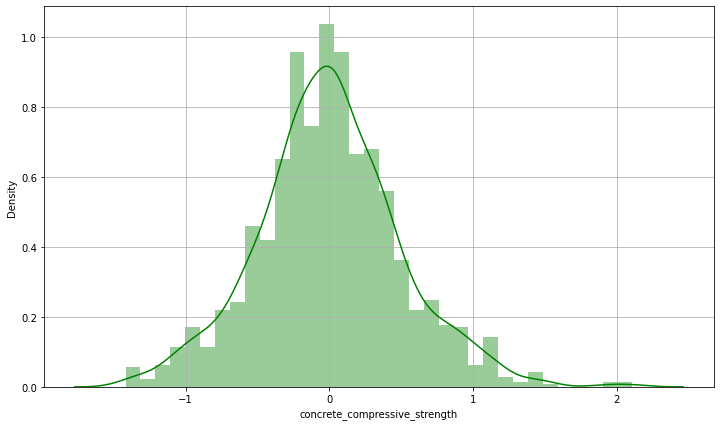

In [27]:
#check how error terms are distributed on train data
y_res = y_train_sc - y_pred_train_be
plt.figure(figsize=(12,7))
sns.distplot(y_res, kde = True, color = 'g')
plt.grid()
plt.show()

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


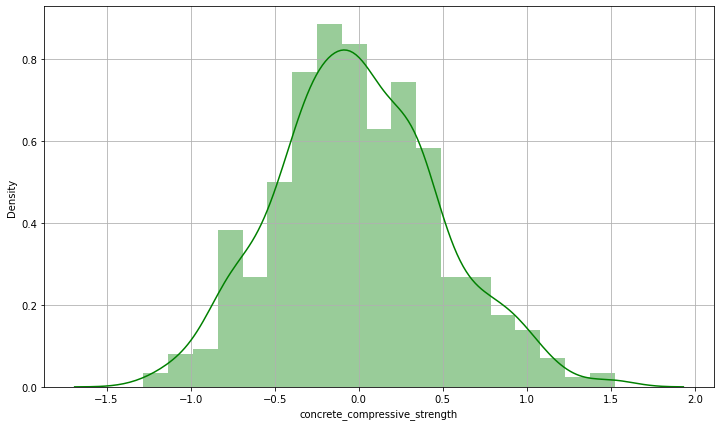

In [28]:
#check how error terms are distributed on test data
y_res = y_test_sc - y_pred_test_be
plt.figure(figsize=(12,7))
sns.distplot(y_res, kde = True, color = 'g')
plt.grid()
plt.show()

C:\Users\User\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


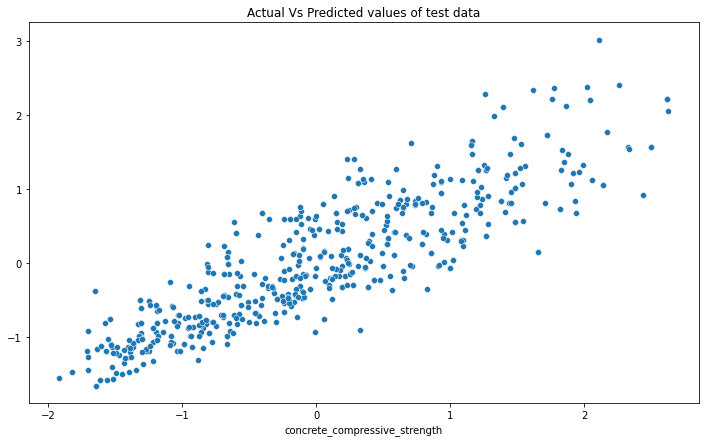

In [29]:
#actual test values vs predicted test values
plt.figure(figsize=(12,7))
plt.title('Actual Vs Predicted values of test data')
sns.scatterplot(y_test_sc,y_pred_test_be)
plt.show()

# Ada Boost regressor

In [30]:
#Splitting data set
y = df['concrete_compressive_strength']
X = df.drop('concrete_compressive_strength',axis=1)

In [31]:
#Train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42, shuffle = True)
print('The shapes of X_train = {0}, y_train = {1}, X_test = {2},y_test = {3}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

The shapes of X_train = (1359, 8), y_train = (1359,), X_test = (583, 8),y_test = (583,)


In [32]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100)
adb.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100)

In [33]:
#Feature importances
adb.feature_importances_
adb_feature_imp = pd.DataFrame(adb.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])
adb_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
adb_feature_imp

,Feature_importance
cement,0.286982
age,0.267744
water,0.198549
blast_furnace_slag,0.089425
superplasticizer,0.060551
fine_aggregate,0.057337
coarse_aggregate,0.034366
fly_ash,0.005045


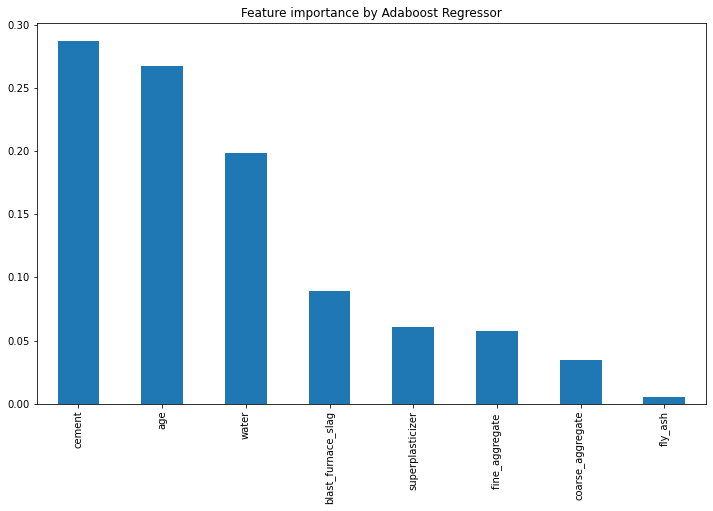

In [34]:
#Visualizing
adb_feature_imp['Feature_importance'].plot(kind='bar', title= 'Feature importance by Adaboost Regressor', figsize=(12,7))
plt.show()

In [35]:
top_features_adb = ['cement','age','water','blast_furnace_slag','superplasticizer','fine_aggregate ','coarse_aggregate']

In [36]:
X_train_adb = X_train[top_features_adb]
X_test_adb = X_test[top_features_adb]

adb1 = AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100)

In [37]:
#fitting on the training data
adb1.fit(X_train_adb,y_train)

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100)

In [38]:
#predictions on training data
y_pred_train = adb1.predict(X_train_adb)

#predictions on testing data
y_pred_test = adb1.predict(X_test_adb)

In [39]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_adb,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_adb,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.8283560125606007
Adj. R2 score of train data is  0.8274666654754224
rmse score of train data is  6.941486820200066

R2 score of test data is  0.8202567285773841
Adj. R2 score of train data is  0.8180685496209348
rmse score of test data is  7.261757161960163


In [40]:
#saving in results
results.loc[len(results)] = ['AdaBoost regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_adb,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_adb,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,AdaBoost regressor,0.828356,0.827467,6.941487,0.820257,0.818069,7.261757


# Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=80, oob_score=True)


#fitting
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=80, oob_score=True)

In [42]:
#feature importances
rf.feature_importances_
rf_feature_imp = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])
rf_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
rf_feature_imp

,Feature_importance
age,0.338205
cement,0.337868
water,0.112312
blast_furnace_slag,0.077696
superplasticizer,0.062608
fine_aggregate,0.026611
coarse_aggregate,0.022490
fly_ash,0.022210


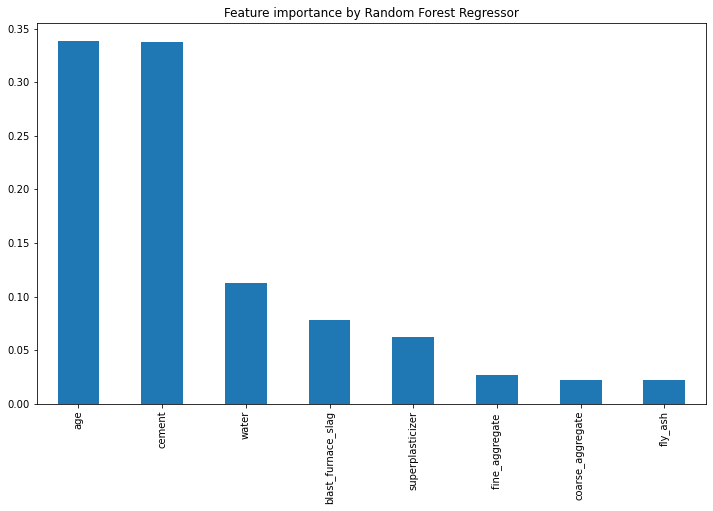

In [43]:
#visualizing
rf_feature_imp['Feature_importance'].plot(kind='bar', title='Feature importance by Random Forest Regressor', figsize=(12,7))
plt.show()

In [44]:
features_by_rf = ['age','cement','water','blast_furnace_slag','superplasticizer']

In [45]:
#Considering only the above features
X_train_rf = X_train[features_by_rf]
X_test_rf = X_test[features_by_rf]

In [46]:
#instantiating random forest regressor
#importing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
rf2 = RandomForestRegressor()




#using Randomized Search CV for hyper parameter tuning
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['mse','mae'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}

rcv = RandomizedSearchCV(estimator = rf2, param_distributions = params, n_iter = 10, scoring = 'r2', cv = 10, verbose=5,
                         random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train_rf,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\User\anaconda3\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [47]:
# best estimator
rcv.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=20, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [48]:
# best parameters
rcv.best_params_

{'oob_score': True,
 'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_depth': 20,
 'criterion': 'mse'}

In [49]:
#best score
rcv.best_score_

0.9201891333635576

In [50]:
# rebuilding the random forest regressor using the best estimator suggested by the Randomized Search CV
rf2 = rcv.best_estimator_

#fitting on the training data
rf2.fit(X_train_rf,y_train)

C:\Users\User\anaconda3\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', max_depth=20, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [51]:
#predictions on train data
y_pred_train = rf2.predict(X_train_rf)

#predictions on test data
y_pred_test = rf2.predict(X_test_rf)

In [52]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rf,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_rf,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.961023680370509
Adj. R2 score of train data is  0.9608796437126026
rmse score of train data is  3.3077952555762966

R2 score of test data is  0.940282013926402
Adj. R2 score of train data is  0.9397645270453483
rmse score of test data is  4.185698836663552


In [53]:
#Updating the results
results.loc[len(results)] = ['Random Forest regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_rf,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_rf,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,AdaBoost regressor,0.828356,0.827467,6.941487,0.820257,0.818069,7.261757
2,Random Forest regressor,0.961024,0.960880,3.307795,0.940282,0.939765,4.185699


# XGBoost Regressor

In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
xgbr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=4,
             missing='nan', monotone_constraints='()', n_estimators=100,
             n_jobs=16, num_parallel_tree=1, random_state=0, reg_alpha=0.5,
             reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
#Fitting on train data
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=4, max_leaves=None, min_child_weight=4, missing='nan',
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor=None, random_state=0, ...)

In [56]:
#feature importances
xgbr_feature_imp = pd.DataFrame(xgbr.feature_importances_, index = X_train.columns, columns=['Feature_importance'])
xgbr_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
xgbr_feature_imp

,Feature_importance
age,0.447175
cement,0.211727
water,0.088063
fly_ash,0.082183
superplasticizer,0.071426
blast_furnace_slag,0.055894
fine_aggregate,0.027376
coarse_aggregate,0.016157


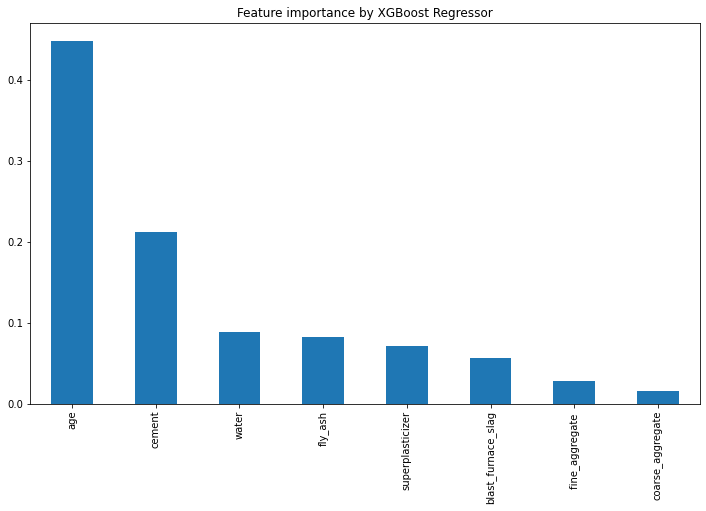

In [57]:
#Visualization
xgbr_feature_imp['Feature_importance'].plot(kind='bar',title='Feature importance by XGBoost Regressor',figsize=(12,7))
plt.show()

In [58]:
xgbr_top_features = ['age','cement','water','fly_ash','superplasticizer','blast_furnace_slag']

In [59]:
X_train_xgbr = X_train[xgbr_top_features]
X_test_xgbr = X_test[xgbr_top_features]

In [60]:
xgbr2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=4,
            monotone_constraints='()', n_estimators=100,
             n_jobs=16, num_parallel_tree=1, random_state=0, reg_alpha=0.5,
             reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
#fitting
xgbr2.fit(X_train_xgbr, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=4, max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor=None, random_state=0, ...)

In [62]:
y_pred_train = xgbr2.predict(X_train_xgbr)
y_pred_test = xgbr2.predict(X_test_xgbr)

In [63]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_xgbr,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_xgbr,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.9435960493720329
Adj. R2 score of train data is  0.943345735981672
rmse score of train data is  3.9791743438660294

R2 score of test data is  0.9432538344721177
Adj. R2 score of train data is  0.9426627285812023
rmse score of test data is  4.080220759042842


In [64]:
#saving in results
results.loc[len(results)] = ['XG Boost regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_xgbr,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_xgbr,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,AdaBoost regressor,0.828356,0.827467,6.941487,0.820257,0.818069,7.261757
2,Random Forest regressor,0.961024,0.960880,3.307795,0.940282,0.939765,4.185699
3,XG Boost regressor,0.943596,0.943346,3.979174,0.943254,0.942663,4.080221


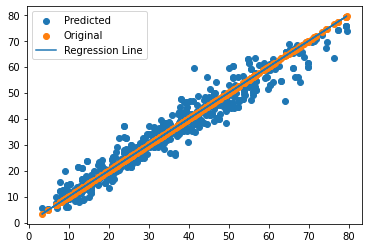

In [65]:
plt.figure()
plt.scatter(y_test, y_pred_test)
plt.scatter(y_test, y_test)
plt.plot(y_test, y_test)
plt.legend(["Predicted", "Original", "Regression Line"])
plt.show()

- It is important to note that the residual line is only one way to assess the fit of the regression line. Other factors, such as the R-squared value, should also be considered.

# Inference

from the table, 
- XG Boost regressor is the best performing model in the table. It has the highest R-squared and adjusted R-squared values, and the lowest RMSE score. 
- The Random Forest regressor is also a good performer, but it has a slightly higher RMSE score. 
- The AdaBoost regressor and 
- The Linear Regression model have the lowest performance.

In [66]:
# Make predictions on new data.
y_pred = xgbr2.predict(X_test_xgbr)

# Output the predictions.
for i in range(len(y_pred)):
    print(f"Predicted strenght{i}: {y_pred[i]}")

Predicted strenght0: 29.947538375854492
Predicted strenght1: 67.2381820678711
Predicted strenght2: 37.45292282104492
Predicted strenght3: 6.9935455322265625
Predicted strenght4: 63.024192810058594
Predicted strenght5: 23.487545013427734
Predicted strenght6: 37.06987762451172
Predicted strenght7: 34.97257614135742
Predicted strenght8: 21.762584686279297
Predicted strenght9: 32.4199333190918
Predicted strenght10: 39.992305755615234
Predicted strenght11: 53.54442596435547
Predicted strenght12: 40.60134506225586
Predicted strenght13: 8.557171821594238
Predicted strenght14: 21.513315200805664
Predicted strenght15: 12.152344703674316
Predicted strenght16: 75.53960418701172
Predicted strenght17: 33.67325973510742
Predicted strenght18: 23.481386184692383
Predicted strenght19: 34.54800796508789
Predicted strenght20: 69.67771911621094
Predicted strenght21: 29.071796417236328
Predicted strenght22: 39.992305755615234
Predicted strenght23: 23.688182830810547
Predicted strenght24: 47.629554748535156

# Compare the predicted durability performance of RAC with conventional concrete 

In [80]:
features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age']
target = 'concrete_compressive_strength'

In [81]:
df['total_aggregate'] = df['coarse_aggregate'] + df['fine_aggregate ']
df['recycled_aggregate_proportion'] = (df['blast_furnace_slag'] + df['fly_ash']) / df['total_aggregate']

threshold = 0.05  # Adjust as needed
df['concrete_type'] = df['recycled_aggregate_proportion'].apply(lambda x: 'Conventional' if x >= threshold else 'RAC')

In [69]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,total_aggregate,recycled_aggregate_proportion,concrete_type
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1716.0,0.000000,RAC
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1731.0,0.000000,RAC
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03,1602.0,0.071161,Conventional
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45,1526.0,0.062254,Conventional
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1602.0,0.071161,Conventional


In [70]:
df.value_counts('concrete_type')

concrete_type
Conventional    1522
RAC              420
dtype: int64

In [71]:
# Split the data into training and test sets for RAC and Conventional Concrete
rac_data = df[df['concrete_type'] == 'RAC']
conventional_data = df[df['concrete_type'] == 'Conventional']

# Check if you have a minimum number of samples for each type
if len(rac_data) < 2 or len(conventional_data) < 2:
    raise ValueError("Insufficient data for analysis. Ensure that your dataset contains samples for both RAC and Conventional concrete.")

rac_X_train, rac_X_test, rac_y_train, rac_y_test = train_test_split(rac_data[features], rac_data[target], test_size=0.2, random_state=42)
conventional_X_train, conventional_X_test, conventional_y_train, conventional_y_test = train_test_split(conventional_data[features], conventional_data[target], test_size=0.2, random_state=42)

# Train linear regression models for RAC and Conventional Concrete
rac_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=4,
            monotone_constraints='()', n_estimators=100,
             n_jobs=16, num_parallel_tree=1, random_state=0, reg_alpha=0.5,
             reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

rac_model.fit(rac_X_train, rac_y_train)

conventional_model =XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=4,
            monotone_constraints='()', n_estimators=100,
             n_jobs=16, num_parallel_tree=1, random_state=0, reg_alpha=0.5,
             reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

conventional_model.fit(conventional_X_train, conventional_y_train)

# Make predictions for RAC and Conventional Concrete
rac_predictions = rac_model.predict(rac_X_test)
conventional_predictions = conventional_model.predict(conventional_X_test)

# Calculate the MSE for both
mse_rac = mean_squared_error(rac_y_test, rac_predictions)
mse_conventional = mean_squared_error(conventional_y_test, conventional_predictions)

# Print the results
print(f'MSE for RAC: {mse_rac}')
print(f'MSE for Conventional Concrete: {mse_conventional}')

MSE for RAC: 15.686166281447308
MSE for Conventional Concrete: 15.879234290459117


In [72]:
# Compare the MSE for RAC and conventional concrete
if mse_rac < mse_conventional:
    print('RAC has a lower MSE than conventional concrete, so it may be a promising sustainable alternative.')
else:
    print('Conventional concrete has a lower MSE than RAC, so it may be the better choice for this project.')

RAC has a lower MSE than conventional concrete, so it may be a promising sustainable alternative.


# Identify the optimal mix design of RAC that maximizes resource efficiency in construction projects.

In [73]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,total_aggregate,recycled_aggregate_proportion
count,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000
mean,278.077240,74.776107,57.480947,179.791246,6.581668,972.969825,777.690113,32.514933,35.310999,1750.659938,0.077069
std,104.029489,86.725396,64.444812,20.209196,5.946032,78.691453,76.718392,28.609012,16.872843,98.219697,0.053771
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,1457.000000,0.000000
25%,190.300000,0.000000,0.000000,164.800000,0.000000,931.225000,739.725000,7.000000,22.935000,1688.250000,0.052629
50%,261.000000,22.000000,0.000000,182.500000,7.000000,968.000000,780.100000,28.000000,33.610000,1754.100000,0.071161
75%,350.000000,145.000000,118.300000,192.000000,10.400000,1030.750000,825.000000,28.000000,45.617500,1829.900000,0.111125
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,120.000000,82.600000,1970.000000,0.259589


In [74]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength', 'total_aggregate',
       'recycled_aggregate_proportion', 'concrete_type'],
      dtype='object')

In [75]:

# Calculate mean values for each mix design variable

initial_mix_design = {
    'cement': df['cement'].mean(),
    'blast_furnace_slag': df['blast_furnace_slag'].mean(),
    'fly_ash': df['fly_ash'].mean(),
    'water': df['water'].mean(),
    'superplasticizer': df['superplasticizer'].mean(),
    'coarse_aggregate': df['coarse_aggregate'].mean(),
    'age': df['age'].mean(),
    'concrete_compressive_strength': df['concrete_compressive_strength'].mean(),
    'fine_aggregate ': df['fine_aggregate '].mean()
}

# Print the initial mix design values
print("Initial Mix Design Values:")
for variable, value in initial_mix_design.items():
    print(f"{variable}: {value}")


Initial Mix Design Values:
cement: 278.07723995880514
blast_furnace_slag: 74.7761071060763
fly_ash: 57.48094747682802
water: 179.79124613800204
superplasticizer: 6.581668383110197
coarse_aggregate: 972.9698249227599
age: 32.51493305870237
concrete_compressive_strength: 35.3109989701338
fine_aggregate : 777.6901132852737


In [76]:
# Define the mix design variables for which you want to calculate bounds
mix_design_variables = ['age', 'cement', 'water', 'fly_ash', 'superplasticizer', 'blast_furnace_slag', 'coarse_aggregate','concrete_compressive_strength','fine_aggregate ']

# Calculate bounds for each mix design variable
variable_bounds = {}

# Loop through each mix design variable and calculate its bounds
for variable in mix_design_variables:
    min_value = df[variable].min()
    max_value = df[variable].max()
    variable_bounds[variable] = (min_value, max_value)

# Print the calculated bounds for the selected mix design variables
for variable, bounds in variable_bounds.items():
    print(f"{variable} - Bounds: {bounds}")


age - Bounds: (1, 120)
cement - Bounds: (102.0, 540.0)
water - Bounds: (121.8, 247.0)
fly_ash - Bounds: (0.0, 200.1)
superplasticizer - Bounds: (0.0, 32.2)
blast_furnace_slag - Bounds: (0.0, 359.4)
coarse_aggregate - Bounds: (801.0, 1145.0)
concrete_compressive_strength - Bounds: (2.33, 82.6)
fine_aggregate  - Bounds: (594.0, 992.6)


In [77]:
# Define the mix design variables for which you want to calculate initial values
mix_design_variables = ['age', 'cement', 'water', 'fly_ash', 'superplasticizer', 'blast_furnace_slag', 'coarse_aggregate','concrete_compressive_strength','fine_aggregate ']

# Calculate initial mix design variables (mean values)
initial_mix_design = {}

# Loop through each mix design variable and calculate the initial value
for variable in mix_design_variables:
    initial_value = df[variable].mean()
    initial_mix_design[variable] = initial_value

# Print the calculated initial mix design variables
print("Initial Mix Design Variables:")
for variable, value in initial_mix_design.items():
    print(f"{variable}: {value}")

Initial Mix Design Variables:
age: 32.51493305870237
cement: 278.07723995880514
water: 179.79124613800204
fly_ash: 57.48094747682802
superplasticizer: 6.581668383110197
blast_furnace_slag: 74.7761071060763
coarse_aggregate: 972.9698249227599
concrete_compressive_strength: 35.3109989701338
fine_aggregate : 777.6901132852737


# The optimal mix design of RAC that maximizes resource efficiency in this construction projects is ...

- 75.54

In [78]:
# Identify the optimal mix design
optimal_mix_design = df.iloc[y_pred.argmax()]

# Print the optimal mix design
print(optimal_mix_design)

cement                            475.0
blast_furnace_slag                  0.0
fly_ash                             0.0
water                             228.0
superplasticizer                    0.0
coarse_aggregate                  932.0
fine_aggregate                    594.0
age                                   7
concrete_compressive_strength      38.6
total_aggregate                  1526.0
recycled_aggregate_proportion       0.0
concrete_type                       RAC
Name: 29, dtype: object


In [79]:
# Calculate the optimal resource efficiency
optimal_resource_efficiency = max(y_pred)

print(optimal_resource_efficiency)

75.539604
